<left>
<table style="margin-top:0px; margin-left:0px;">
<tr>
  <td><img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/style/worm.png" alt="WORM" title="WORM" width=50/></td>
  <td><h1 style=font-size:30px>Introduction to Estimating Thermodynamic Properties<br>of Aqueous Organic Compounds</h1><br />
</tr>
</table>
</left>

##### By Jordyn Robare and Grayson Boyer
In this notebook, we will learn how the program AqOrg estimates thermodynamic properties of organic molecules, derives Helgeson-Kirkam-Flowers (HKF) parameters, and then extrapolates thermodynamic properties to non-standard conditions so that the compound can be written in reactions at conditions relevant to a research question.

Email Jordyn at jrobare@uw.edu with any questions.

### Import Packages:

In [1]:
from aqorg import Estimate
from pychnosz import thermo, mod_OBIGT, add_OBIGT, reset, info, subcrt
_ = thermo("WORM")

reset: thermodynamic system initialized
The WORM thermodynamic database has been loaded: 1713 aqueous, 1976 total species


### 1. Estimating thermodynamic properties using group contribution

The group contribution method of estimating thermodynamic properties first involves splitting a molecule into first- or second-order groups. First-order means that one functional group within a molecule is considered without accounting for the atoms the group is connected to. Second-order group contrubution considers each atom in a molecule and then everything that atom is directly bonded to. An example is shown below for **1-hexanol**.

<img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/4-Thermodynamic-Property-Estimation/1-Aq-Organics-Intro-Demo/Figure-1.png" width=1000 height=600 style="background-color:white;padding:0px;"/>

As you can see, there are five CH2 groups in the first-order method. In this case, they would all be treated equally in terms of their thermodynamic properties. In the second-order method, one of these groups is treated differently than the others because it is bonded to one oxygen and one carbon instead of two carbons. This group will have different properties from the other CH2 groups. 

Second-order syntax:

- The group being considered is in square brackets.
- H's are not considered their own group and can be included in the square brackets of the main group. 
- The atoms bonded to the main group are depicted after a hyphen. When there are more than one group bonded to the main group, the additional atoms are put in parentheses. It doesn't matter the order all the subsituents are listed. In fact, you may even see them before the main group. 

     Example: C-[CH3] is the same as [CH3]-C or [CH3]\(-C)
     
Second-order groups are coded in SMARTS notation. For a thorough explanation of SMARTS notation, visit https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html.

#### 1.1 Breaking a molecule into second-order groups

You can break a molecule into its groups using ```Estimate```. Change the molecule name to an organic molecule you want to see the second-order groups for and then run the cell. Remember to keep the molecule in quotations.

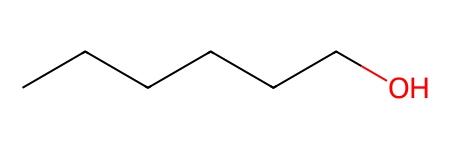

,[C!H3]-[CX4H3R0],C-[CX4H2R0]-C,O-[CX4H2]-C,C-[OX2H],formula
hexanol,1,4,1,1,C6H14O


In [2]:
Estimate('hexanol').group_matches

After running the cell above, you should see your molecule, its second-order groups and the number of times they appear in the molecule you are testing, and the chemical formula of the molecule.

Note: the X's shown after the main element in the group denotes connectivity. For example, CX4 means carbon has 4 bonds. 

#### 1.2 Estimating properties from group contribution

In order to estimate properties of a molecule of interest using second-order group contribution, the contribution of each group is multiplied by the number of times they appears in the molecule and then added to get a total sum of contributions to that property. Each group, for example C-[CH3], will have its own value for the standard Gibbs energy of hydration $\Delta_h$G$^{\circ}$, the standard enthalpy of hydration $\Delta_h$H$^{\circ}$, the standard heat capacity of hydration $\Delta_h$Cp$^{\circ}$, and volume V$^{\circ}_2$.

For example, the hypothetical molecule shown below has two A groups and one B group. So, for each thermodynamic property, A's contribution is counted twice and B's contribution is counted once. Example property contributions are shown in the table.

<img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/4-Thermodynamic-Property-Estimation/1-Aq-Organics-Intro-Demo/Figure-2.png" width=500 height=600 style="background-color:white;padding:0px;"/>

<img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/4-Thermodynamic-Property-Estimation/1-Aq-Organics-Intro-Demo/Figure-3.png" width=400 height=600 style="background-color:white;padding:0px;"/>

You can view all the group contribution values used in `Estimate` with `.group_data` or `.group_data.head()` to show only the first five groups in the table.

In [3]:
Estimate('hexanol', show=False).group_data.head()

,group,Gh,Gh_err,Gh_n,Hh,Hh_err,Hh_n,Cph,Cph_err,Cp_count,V,V_err,V_count,refs,elem,published_notes,personal_notes 1,personal_notes 2
smarts,,,,,,,,,,,,,,,,,,
Yo,Yo,7.95,NaN,NaN,-2.29,NaN,NaN,0,NaN,NaN,1.12,NaN,NaN,Plyasunov et al. 2004a,,NaN,material point,NaN
[C!H3]-[CX4H3R0],C-(C)(H)3,3.72,0.07,136,-8.19,0.18,99,132,4,38,25.56,0.64,52,Plyasunov et al. 2004a,CH3,NaN,NaN,NaN
[CX4H3R0]-O,C-(O)(H)3,3.72,0.07,136,-8.19,0.18,99,132,4,38,25.56,0.64,52,Plyasunov et al. 2004a,CH3,NaN,NaN,NaN
C-[CX4H2R0]-C,C-(C)(H)2,0.68,0.03,96,-3.52,0.09,63,62,2,20,15.61,0.11,29,Plyasunov et al. 2004a,CH2,NaN,typo in table,NaN
C-[CX4H1R0](-C)-C,C-(C)(H),-1.93,0.16,32,2.34,0.54,22,-17,10,2,5.96,0.8,8,Plyasunov et al. 2004a,CH,NaN,typo in table,NaN


Run the cell below to use ```Estimate``` to estimate properties for your molecule using second-order group contribution. With the calculated thermodynamic properties, the program will estimate HKF (Helgeson-Kirkam-Flowers) parameters. Since the group contribution calculations were all done for standard conditions (25$^{\circ}$C and 1 bar), we need a way to calculate these values at conditions that are relevant to our scientific investigations. For example, we may want to calculate whether a reaction is favorable in a hot spring that is 50$^{\circ}$C.

In [4]:
estimated_properties = Estimate('hexanol', show=False).OBIGT
add_OBIGT(estimated_properties)

add_OBIGT: read 1 rows; made 1 replacements, 0 additions [energy units: J]


[np.int64(932)]

You can view the new thermodynamic data you estimated for your molecule using ```info(info(molecule))```

In [5]:
info(info("hexanol"))

,name,abbrv,formula,state,ref1,ref2,date,model,E_units,G,...,Cp,V,a1,a2,a3,a4,c1,c2,omega,Z
0,hexanol,C6H14O,C6H14O,aq,AqOrg,GrpAdd,31/12/2025 13:18:54,HKF,J,-147480.0,...,613.200273,117.72,9.878325,7045.035804,119.945631,-467116.670978,581.936497,126553.0,-60209.117939,0.0


### 2. Writing a reaction at a specified temperature and pressure:

Once you have a molecule's properties and HKF parameters calculated, you can write reactions involving the molecule at various temperatures and pressures. Below we will calculate properties for the following reaction at 50$^\circ$C and 1 bar pressure.

<img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/4-Thermodynamic-Property-Estimation/1-Aq-Organics-Intro-Demo/Figure-4.png" width=500 height=600 style="background-color:white;padding:20px;"/>

In [6]:
subcrt(["hexanol", "hexene", "water"], [-1, 1, 1], T=50, P=1)

subcrt: 3 species at 50 ºC and 1.00 bar (wet) [energy units: J]


,coeff,name,formula,state,ispecies,model
0,-1,hexanol,C6H14O,aq,932,HKF
1,1,hexene,C6H12,aq,909,HKF
2,1,water,H2O,liq,1,water.SUPCRT92


,T,P,rho,logK,G,H,S,V,Cp
0,50.0,1.0,0.98803,-1.729958,10702.606202,31046.963031,62.861029,-371.223377,-11.865207


SubcrtResult with 1 properties calculated

The standard Gibbs free energy of formation of hexanol is estimated to be about **2558 cal/mol** at 50$^\circ$C and 1 bar.

### 3. Testing

Now let's test if our estimations are close to experimental values. First let's pull up our estimated properties again. 

In [7]:
info(info("hexanol"))

,name,abbrv,formula,state,ref1,ref2,date,model,E_units,G,...,Cp,V,a1,a2,a3,a4,c1,c2,omega,Z
0,hexanol,C6H14O,C6H14O,aq,AqOrg,GrpAdd,31/12/2025 13:18:54,HKF,J,-147480.0,...,613.200273,117.72,9.878325,7045.035804,119.945631,-467116.670978,581.936497,126553.0,-60209.117939,0.0


If the molecule we estimated already has thermodynamic data in our database, we can use ```reset()``` to get rid of our estimates and return to the original database.

In [8]:
reset()
info(info("hexanol"))

reset: thermodynamic system initialized


,name,abbrv,formula,state,ref1,ref2,date,model,E_units,G,...,Cp,V,a1,a2,a3,a4,c1,c2,omega,Z
0,hexanol,NaN,C6H13OH,aq,SH90,SLOP16.7,1998-06-02,HKF,cal,-35490.0,...,144.4,118.65,1.78125,2748.61,12.591,-39152.0,127.661,57074.0,-55800.0,0.0


Do the values for $\Delta_h$G$^{\circ}$ look similar? Mind that they may be in different units: calories per mole or Joules per mole. The conversion between the two is 4.184 Joules = 1 calorie.

In [9]:
info(info("hexanol"))['G']*4.184

0   -148490.16
Name: G, dtype: float64

If you plan to use your estimated properties further, re-run ```Estimate``` above and do not use the ```reset()``` function. 